## Understanding Neural Networks and Keras Library


Detailed instructions can be found at https://keras.io.


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

In [ ]:
#from google.colab import files 

try:
  import utils
except ModuleNotFoundError:
  src = list(files.upload().values())[0]
  open('utils.py','wb').write(src)
  import utils

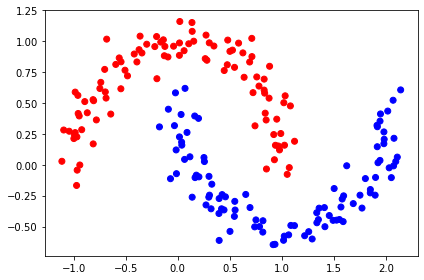

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors


X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

Let's split it into a training and testing set 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit. 

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [ ]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of 
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in 
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer 

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [ ]:
### YOUR CODE HERE ###
perceptron = Sequential()

#keras.Input vs. dense? Input dim specification necessary or only for .summary() (performance impact)? https://keras.io/guides/sequential_model/#specifying-the-input-shape-in-advance
perceptron.add(Dense(1, input_dim=2, activation='sigmoid'))


Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the loss function as "binary_crossentropy". 

In [ ]:
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)

Q2. Now we train the built perceptron with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
perceptron.fit(X_train, y_train, epochs=500, batch_size=10)

Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 1.0293
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 1.0050
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 0.9749
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 0.9471
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 0.9191
Epoch 6/500
16/16 [==============================] - 0s 1ms/step - loss: 0.8932
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 0.8697
Epoch 8/500
16/16 [==============================] - 0s 1ms/step - loss: 0.8462
Epoch 9/500
16/16 [==============================] - 0s 1ms/step - loss: 0.8242
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 0.8041
Epoch 11/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7847
Epoch 12/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7665
Epoch 13/500
16/16 [=================

Q3. Compute accuracy by implementing your own function. 

In [ ]:
y_preds = perceptron.predict(X_test) 
y_preds = np.where(y_preds.T[0] > 0.5, 1, 0)

In [ ]:
### Build your own function to calculate accuracy###
def accuracy(y, y_preds):
    return (y == y_preds).sum() / y_preds.shape[0]

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.85


Text(18.625, 0.5, 'Test')

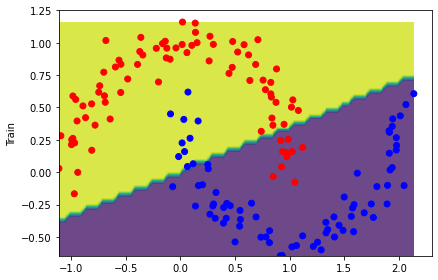

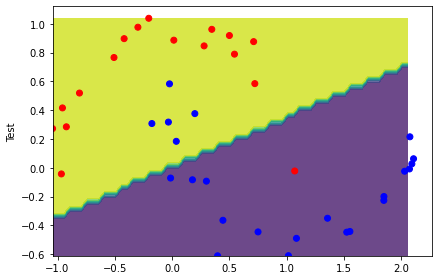

In [ ]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For this exercise, use Keras to create a 2-layer neural network by completing build_one_output_model(). We will then add one hidden layer of 2 units and an output layer of 1 unit (corresponding to our classes- sometimes referred to as a "readout" layer). 

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer

from keras.layers import Dense
# SGD is the learning algorithm we will use
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [ ]:
def build_one_output_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with 2 units 
    model.add(Dense(2, input_dim=2, activation='relu'))

    # Add a final output layer with 1 unit 
    model.add(Dense(1, input_dim=2, activation='sigmoid'))
    

    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)

    # compile the model with "binary_crossentropy" loss and SGD optimizer. 
    model.compile(loss="binary_crossentropy", optimizer=sgd)

    return model


In [ ]:
model = build_one_output_model()

Q2. Fit your model by training set with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, epochs=500, batch_size=10)

Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6151
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6092
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6029
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5971
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5914
Epoch 6/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5859
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5809
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5764
Epoch 9/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5716
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5672
Epoch 11/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5627
Epoch 12/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5585
Epoch 13/500
16/16 [=================

Q3. Compute accuracy by using your own function.

In [ ]:
### YOUR CODE HERE ###
y_preds = model.predict(X_test) 
y_preds = np.where(y_preds.T[0] > 0.5, 1, 0)
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.85


Text(18.625, 0.5, 'Test')

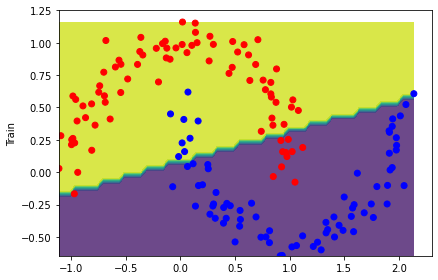

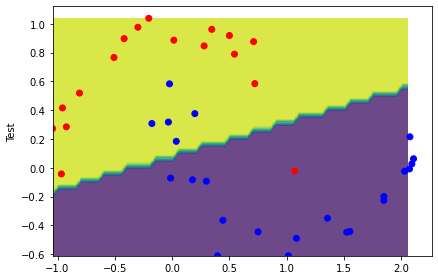

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

It is actually quite rare for a classification neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is the number of classes. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding". 

In [ ]:
# Before we can fit the network, we need to one-hot vectorize our response.
# There is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [ ]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]


The one hot encoded vectors will serve as future labels for our models. 

# Exercise 3: 

Q1.Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2. 


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

We use SGD optimizer and "categorical_crossentropy" loss function to compile the model.

In [ ]:
def build_classification_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    model.add(Dense(10, input_dim=2, activation='relu'))
    model.add(Dense(5, input_dim=10, activation='relu'))
    model.add(Dense(2, input_dim=5, activation='softmax'))
    
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)
    model.compile(loss="categorical_crossentropy", optimizer=sgd)
    
    return model

In [ ]:
model = build_classification_model()

Q2. Fit your model by training set

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train_vectorized, epochs=500, batch_size=10)

Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6726
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6430
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6112
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5823
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5564
Epoch 6/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5348
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5155
Epoch 8/500
16/16 [==============================] - 0s 1ms/step - loss: 0.4983
Epoch 9/500
16/16 [==============================] - 0s 1ms/step - loss: 0.4829
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 0.4682
Epoch 11/500
16/16 [==============================] - 0s 1ms/step - loss: 0.4558
Epoch 12/500
16/16 [==============================] - ETA: 0s - loss: 0.417 - 0s 1ms/step - loss: 0.4439
Epoch 13/500


Q3. Compute accuracy by using your own function

In [ ]:
y_preds = model.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.925


Text(18.625, 0.5, 'Test')

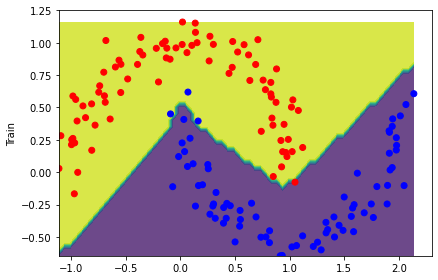

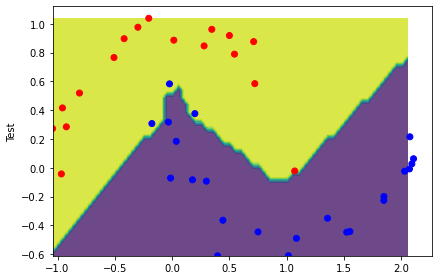

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:
### Short answer-questions

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.

Ans- 

The problem with a high learning rate is that the function may over-adjust weights and biases, resulting in the model not finding the minima quickly and jumping around. Due to the computational resources GD requires, this is sub-optimal. 

SGD updates the parameters based on singular data points, it is far faster than GD. While less computationally expensive, the error is not as well minimized, so choosing a high learning rate will result in erratic training and may not find the minima. 

Unlike GD, since SGD may miss the minima as it bases descent direction on a subset and not the full batch. This may cause divergence in a dataset with a lot of nosie. Full batch setting would converge to the optimal minimum, since it calculates using entire batch and not a particular value.

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Ans- 

Data augmentation involves using techniques to artificially create new training data from existing training data. Techniques such as flipping, cropping, and rotation may not be appropriate depending on the augmentation parameters, as handwritten digits are sensitive to these transformations.

Examples: 


1.   An rotation augmentation applied to a picture of a dog is still a dog, but the same rotation applied to "6" may result in "9", an entirely different number)
2.   Another example is when cropping is used in case of a dog we can still get an image of a dog. But same technique applied to for instance "7" can result in an image corresponding to "1".

Q3. Suppose we have the following two neural networks containing fully-connected layers only. 
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A.

Ans-

Network A is faster to train, less prone to overfitting, and less prone to the vanishing/exploding gradient problem. Network A has 100x100=10000 connections (and thus weights) from the first to the second layer, while Network B has only 100x10+10x100=2000 weights. A has more parameters than B, so B is less computationally expensive than A and is easier/faster to train. A is more prone to overfitting.

Network B is able to capture more complexity (for example non-linearity) given its deeper architecture and may result in better performance

# Exercise 5:

Now let's revisit the classification problem (Dataset 1) in Homework 2. Build a neural network to predict the output in the default payment dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

"CreditDefault_training.csv" has 3985 records. 

"CreditDefault_Xtest.csv" contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

Q1. Read the data<br/>
- Apply standardization to continuous values<br/> 
- Convert categorical variables and the target "default.payment.next.month" into one-hot encodings. <br>
- Split data into train and validation set<br/>

In [ ]:
import numpy as np
import pandas as pd
import io

In [ ]:
### YOUR CODE HERE ###
try:
  train = pd.read_csv('CreditDefault_training.csv')
  test = pd.read_csv('CreditDefault_Xtest.csv')
except FileNotFoundError:
  uploaded = files.upload()
  train = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training.csv']))
  test = pd.read_csv(io.BytesIO(uploaded['CreditDefault_Xtest.csv']))

In [ ]:
# Split data into X (features) and y (target)
# Please make sure y is in a one-hot representation
# WRITE CODE HERE
X, y = train.drop('default.payment.next.month', axis=1), train['default.payment.next.month']
y = to_categorical(y)

In [ ]:
#standardization and one-hot encoding 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_cols_auto = ['SEX', 'EDUCATION', 'MARRIAGE']
cat_cols_manual = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
cat_cols = cat_cols_auto + cat_cols_manual
pay_categories = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
categories = [list(range(1, X[col].nunique()+1)) for col in cat_cols_auto] + [pay_categories] * len(cat_cols_manual)
#Categorical
X_cat = X[cat_cols]
test_cat = test[cat_cols]

#Onehot
encoder = OneHotEncoder(categories=categories).fit(X_cat)
X_onehot = encoder.transform(X_cat).toarray()
test_onehot = encoder.transform(test_cat).toarray()
X_onehot = pd.DataFrame(X_onehot, columns = encoder.get_feature_names(cat_cols))
test_onehot = pd.DataFrame(test_onehot, columns = encoder.get_feature_names(cat_cols))

#Numeric
X_num = X.drop(cat_cols, axis=1)
test_num = test.drop(cat_cols, axis=1)

#Scale
scaler = StandardScaler().fit(X_num)
X_scaled = scaler.transform(X_num)
test_scaled = scaler.transform(test_num)
X_scaled = pd.DataFrame(X_scaled, columns = X_num.columns)
test_scaled = pd.DataFrame(test_scaled, columns = test_num.columns)

#Result
X = pd.concat([X_onehot, X_scaled], axis=1)
test = pd.concat([test_onehot, test_scaled], axis=1)

In [ ]:
# Split data into training and validation set (the code has been provided)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Print out the shape of X_train
X_train.shape

(2789, 97)

Q2. Build a neural network to predict the output in the "CreditDefault_training.csv". The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different number of layers, different number of units in layers and experiment with hyperparameters. 

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please use 'relu' activation function for all intermediate layers.

Please build your model in the build_final_model() function

In [ ]:
from tensorflow.keras.constraints import max_norm

def build_final_model():
    model = Sequential()
    ### YOUR CODE HERE ###
    
    # First add fully-connected (Dense) hidden layers with appropriate input dimension
    model.add(Dense(256, input_dim=97, activation='relu', kernel_constraint=max_norm(3)))

    # Drop out layer
    model.add(Dropout(0.2))

    # Continues the process 
    model.add(Dense(256, activation='relu', kernel_constraint=max_norm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu', kernel_constraint=max_norm(3)))
    model.add(Dropout(0.23))
    model.add(Dense(128, activation='relu', kernel_constraint=max_norm(3)))
    model.add(Dropout(0.26))
    model.add(Dense(64, activation='relu', kernel_constraint=max_norm(3)))
    model.add(Dropout(0.29))
    # Finally, add a readout layer
    model.add(Dense(2, activation='softmax'))
    ######################
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])
    

    return model

In [ ]:
model = build_final_model()

Q3. Fit the model by training set with epochs=100, batch_size=32

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
88/88 [==============================] - 1s 4ms/step - loss: 0.5812 - accuracy: 0.7644
Epoch 2/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5526 - accuracy: 0.7669
Epoch 3/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5388 - accuracy: 0.7669
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7669
Epoch 5/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5268 - accuracy: 0.7669
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5196 - accuracy: 0.7669
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5105 - accuracy: 0.7666
Epoch 8/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5086 - accuracy: 0.7669
Epoch 9/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4932 - accuracy: 0.7669
Epoch 10/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.7666
Epoch 11/

Q4. Obtain predictions on validation set and print accuracy, precision & recall and F1 score.

F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
def precision(y, y_preds): #TP/(TP+FP)
    TP = np.sum(np.logical_and(y == 1, y_preds == 1))
    FP = np.sum(np.logical_and(y == 0, y_preds == 1))
    return TP/(TP+FP)

def recall(y, y_preds): #TP/(TP+FN)
    TP = np.sum(np.logical_and(y == 1, y_preds == 1))
    FN = np.sum(np.logical_and(y == 1, y_preds == 0))
    return TP/(TP+FN)

def f1(y, y_preds):
    p = precision(y, y_preds)
    r = recall(y, y_preds)
    return 2 * (p * r) / (p + r)

In [ ]:
y_preds = model.predict(X_val)
y_preds = np.argmax(y_preds, axis=1)
y_true = np.argmax(y_val, axis=1)

print('Accuracy:', accuracy(y_true, y_preds))
print('Precision:', precision(y_true, y_preds))
print('Recall:', recall(y_true, y_preds))
print('F1:', f1(y_true , y_preds))

Accuracy: 0.8060200668896321
Precision: 0.5805084745762712
Recall: 0.5074074074074074
F1: 0.541501976284585


Q5. Plot the ROC curve by giving appropriate names for title and axes.

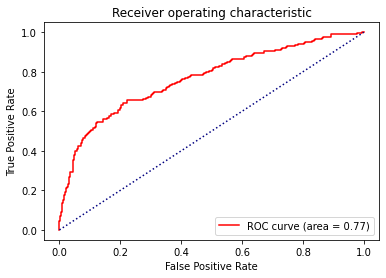

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes. 
### WRITE CODE HERE
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

probs = model.predict(X_val)
preds = probs[:,1]
fpr, tpr, _ = roc_curve(np.argmax(y_val, axis=1), preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})", color='red');
plt.plot([0,1], [0,1], color='navy', linestyle='dotted')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
naive = (len(y_true) - sum(y_true)) / len(y_true) #returns proportion of correct predictions
naive

0.774247491638796

Is the accurancy value impressive for this dataset? Please explain based on the structure of this dataset. 

Ans - Not particularly. The naive model, which predicts default only based on the proportion of defaults in the dataset, would have a 77% accuracy. The dataset is thus considered imbalanced. The model constructed only has a slight improvement in the accuracy metric from 77% to 81%. 

For these five metrics (accuracy, precision, recall, F1 score and AUC), please explain their connections and differences. For our dataset, which metrics should we focus more on?

Ans-

Accuracy is simply the proportion of correct predictions. Precision and recall are slightly more nuanced. Precision is the number of true positives over total predicted positives (true positives and false positives), while recall is the number of true positives over the total actual positives (true positives and false negatives). Unlike accuracy, precision and recall use a subset of terms used to calcualte accuracy and are both more appropriate than accuracy when the dataset is biased, such as in the dataset examined above. The F1 score is a combination of the two metrics, the harmonic mean of precision and recall. AUC is the refers to the area under the ROC curve. This is a measure of how the true positive and false positive rates change as the probability threshold changes. Like accuracy, AUC is to be used on balanced datasets, as the value returned can be "optimistic" for imbalanced datasets.

For our dataset, it would make the most sense to focus on the F1 score. F1 score combines the precision and recall score, which are likely both important to business use case. While less interpretable that accuracy, due to the imbalance of the target variable, it is more appropriate to chose the F1 score.


#### Tuning hyperparameters using cross-validation:<br/>
Cross-validation in neural networks is computationally expensive. So we will perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function.

Here, we will use KerasClassifier class, which act as a wrapper of scikit-learn’s library in Keras comes as a handy tool for automating the tuning process.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
from keras.wrappers.scikit_learn import KerasClassifier

Q6. First we create a function to build neural network model with activation function and learning rate of SGD as parameters

In [ ]:
# Build create_model function with activation function and learning rate of SGD as parameters
def create_model(learning_rate, activation):
  
    # Create an SGD optimizer with its learning rate equal to the "learning_rate" parameter value of create_model
    opt = SGD(learning_rate=learning_rate, decay=1e-7, momentum=.9)
  
    # Create your neural network model 
    model = Sequential()
    # Please keep the same architecture as the NN model you have built above in order for comparison
    # Please use the activation given by the "activation" parameter value of create_model for all inner layers except for the final layer.
    # For the final output layer, choose an appropriate activation function by yourself.
    
    ### WRITE CODE HERE
    model.add(Dense(256, activation=activation, kernel_constraint=max_norm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation=activation, kernel_constraint=max_norm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation=activation, kernel_constraint=max_norm(3)))
    model.add(Dropout(0.23))
    model.add(Dense(128, activation=activation, kernel_constraint=max_norm(3)))
    model.add(Dropout(0.26))
    model.add(Dense(64, activation=activation, kernel_constraint=max_norm(3)))
    model.add(Dropout(0.29))
    model.add(Dense(2, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics=["accuracy"])
    return model

Create a model object using KerasClassifier from keras.wrappers.scikit_learn by passing the create_model function.

In [ ]:
model = KerasClassifier(build_fn = create_model,
                       verbose = 0)

<ipython-input-40-f0be3b82ac3c>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,


Q7. Try the following hyperparameters:

- activation function: relu, tanh

- batch size: 16, 32 and 64

- epochs: 100, 200 and 500

- learning rate: 0.01, 0.001 and 0.0001

Use dictionary object to define the parameter search space.

In [ ]:
### WRITE CODE HERE
params = {
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'epochs': [100, 200, 500],
    'learning_rate': [0.01, 0.001, 0.0001]
}
    

Next we perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. We select the randomized search as it works faster than a grid search. Here, we will perform a 5-fold cross-validation search. 

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV for the use of RandomizedSearchCV.

In [ ]:
### WRITE CODE HERE 
random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions = params,
                                   cv = 5) 


In [ ]:
random_search_results = random_search.fit(X_train, y_train) # it may take several hours.

Q8. Print the best model parameters 

In [ ]:
### WRITE CODE HERE 
best_params = random_search_results.best_params_
best_params

{'learning_rate': 0.001, 'epochs': 100, 'batch_size': 16, 'activation': 'tanh'}

Q9. Fit the model with the Best Parameter Set

In [ ]:
### WRITE CODE HERE 
nn = create_model(learning_rate=best_params['learning_rate'], activation=best_params['activation'])
nn.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

Epoch 1/100
175/175 [==============================] - 1s 3ms/step - loss: 0.5309 - accuracy: 0.7504
Epoch 2/100
175/175 [==============================] - 1s 3ms/step - loss: 0.4868 - accuracy: 0.7892
Epoch 3/100
175/175 [==============================] - 1s 3ms/step - loss: 0.4776 - accuracy: 0.7992
Epoch 4/100
175/175 [==============================] - 1s 3ms/step - loss: 0.4664 - accuracy: 0.8006
Epoch 5/100
175/175 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.8035
Epoch 6/100
175/175 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.8057
Epoch 7/100
175/175 [==============================] - 1s 3ms/step - loss: 0.4549 - accuracy: 0.8093: 0s - loss: 0.465
Epoch 8/100
175/175 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.8017
Epoch 9/100
175/175 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.8103
Epoch 10/100
175/175 [==============================] - 0s 3ms/step - los

Q10. Obtain predictions on validation set and print accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE 
y_preds = nn.predict(X_val)
y_preds = np.argmax(y_preds, axis=1)

print('Accuracy:', accuracy(np.argmax(y_val, axis=1), y_preds))
print('Precision:', precision(np.argmax(y_val, axis=1), y_preds))
print('Recall:', recall(np.argmax(y_val, axis=1), y_preds))
print('F1:', f1(np.argmax(y_val, axis=1), y_preds))

Accuracy: 0.81438127090301
Precision: 0.6176470588235294
Recall: 0.4666666666666667
F1: 0.5316455696202531


Do you get a better accuracy/recall/precision/F1 score than the first NN model you have built in exercise 5? Explain.

Ans- 

Depends on the metric selected. The resultant accuracy is slightly better due to the neural network learning more/faster due to better optimized hyperparameters. However, this is because the random search prioritized accuracy over other metrics. As such, precision, recall, and F1 suffered in comparison. Random search may also result in choosing a subset of less than optimal hyperparameters than the one tested on in exercise 5, although this is a rare scenario.

### Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same default payment dataset to produce Logistic Regression and Random Forest models.

Q11. Implement a function logistic_regression_model that returns a logistic regression model with the best paprameters. You will use GridSearchCV to find the best parameters. The parameters search space is up to you. If there is any ConvergenceWarning, increase the number of iterations.

In [ ]:
def logistic_regression_model(X_train, y_train):
    ### YOUR CODE HERE ###
    param_grid = {
        'C': np.arange(0.1, 5, 0.1),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }

    clf = LogisticRegression(max_iter=500)
    grid_search = GridSearchCV(estimator = clf, scoring='f1', param_grid = param_grid, cv = 5, n_jobs = -1)
    grid_search.fit(X_train, np.argmax(y_train, axis=1))
    ######################
    return grid_search.best_estimator_

lr = logistic_regression_model(X_train, y_train)

Q12. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
# fit the model
# compute accuracy,precision,recall on validation set
### YOUR CODE HERE ###
y_preds = lr.predict(X_val)

print('Accuracy:', accuracy(np.argmax(y_val, axis=1), y_preds))
print('Precision:', precision(np.argmax(y_val, axis=1), y_preds))
print('Recall:', recall(np.argmax(y_val, axis=1), y_preds))
print('F1:', f1(np.argmax(y_val, axis=1), y_preds))

Accuracy: 0.8235785953177257
Precision: 0.6685714285714286
Recall: 0.43333333333333335
F1: 0.5258426966292136


Q13. Plot the ROC curve by giving appropriate names for title and axes. 

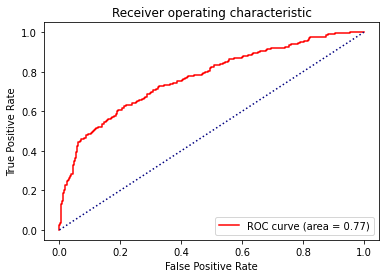

In [ ]:
### WRITE CODE HERE
probs = lr.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, _ = roc_curve(np.argmax(y_val, axis=1), preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})", color='red');
plt.plot([0,1], [0,1], color='navy', linestyle='dotted')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Q14. Implement a function random_forest_model that returns a random forest model with the best paprameters. You will apply GridSearchCV to find the best parameters. The parameter search space is up to you. (Please set the random state of RandomForestClassifier to be 26.)

In [ ]:
def random_forest_model(X_train, y_train):
    rf = RandomForestClassifier(random_state=26) # Please set the random state to be 26
    ### YOUR CODE HERE ###
    param_grid = {
        'max_depth': [20,25,30,None],
        'max_features': [22,23,24,'auto'],
        'min_samples_leaf': [1,2,3],
        'min_samples_split': [6,7,8],
        'n_estimators': [75,100,125]
    }
    
    grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
    grid_search.fit(X_train, np.argmax(y_train, axis=1))
    
    return grid_search.best_estimator_

rf = random_forest_model(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


Q15. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE
y_preds = rf.predict(X_val)

print('Accuracy:', accuracy(np.argmax(y_val, axis=1), y_preds))
print('Precision:', precision(np.argmax(y_val, axis=1), y_preds))
print('Recall:', recall(np.argmax(y_val, axis=1), y_preds))
print('F1:', f1(np.argmax(y_val, axis=1), y_preds))

Accuracy: 0.8118729096989966
Precision: 0.6142131979695431
Recall: 0.44814814814814813
F1: 0.5182012847965738


Q16. Plot the ROC curve by giving appropriate names for title and axes.

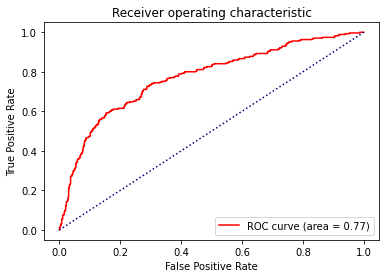

In [ ]:
probs = rf.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, _ = roc_curve(np.argmax(y_val, axis=1), preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})", color='red');
plt.plot([0,1], [0,1], color='navy', linestyle='dotted')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Q17: Which of the above 3 models (NN, Logistic function and random forest) worked best for you? Explain in details the reason for good/bad performance for each of the models?


The NN worked best for this dataset. While the accuracy was not as high as the logistic function and random forest, the F1 score is higher. 

Logistic regression models are less inclined to overfit, train quickly, and are easy to interpret. However, they require assumptions of linearity, low multicolinearity, and are not able to fit on complex datasets. 

Random forest models are flexible, does not require assumptions of linearity, does not require normalization, handles high dimensionality, and can capture complex relationships. However, random forest can be biased, especially towards categorical variables with lots of levels, and may not perform well on imbalanced datasets.

Neural networks can automatically perform feature selection, work on non-linear data, are very flexible, can capture a lot of complexity, and can continuously learn. However, neural networks are very complex and may result in overfitting, are difficult to train, and difficult to scale.

NNs are able to better capture nuances over the logistic regression model and does not require satisfying assumptions of non-multicolinearity and non-linearity. NNs also are able to capture more complexity versus random forests and do not suffer from the bias issue. These two attributes can explain the reason for the better performance of neural networks over logistic regression and random forest.

Using the best of the above 3 models, obtain predictions for the test set.

In [ ]:
### YOUR CODE HERE ###
y_pred = nn.predict(test)
y_pred = np.argmax(y_pred, axis=1)

# Exercise 6

### Convolution Neural Netwrok

In neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used.

CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. 

The dataset which we will use in this part is Fashion-MNIST classification dataset. This is a dataset of 60,000 28x28 pixel grayscale images of items of 10 types of clothing, along with a test set of 10,000 images.

The mapping of all 0-9 integers to class labels is listed below.

0: T-shirt/top<br>
1: Trouser<br>
2: Pullover<br>
3: Dress<br>
4: Coat<br>
5: Sandal<br>
6: Shirt<br>
7: Sneaker<br>
8: Bag<br>
9: Ankle boot<br>



In [ ]:
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(x_train.shape)

(60000, 28, 28)


Create a plot of the first nine images in the training dataset.

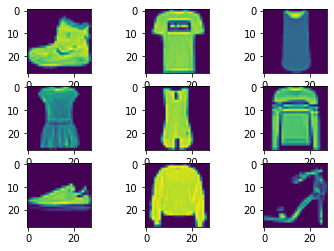

In [ ]:
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

Q1. To process images in neural network, we have to indicate how may channels (depth) we are going to use. For instance, a coloful image from a standard digital camera will have a red, green and blue channel (RGB), so it has 3 channels (i.e. depth=3) in total, whereas a grayscale image only has 1 channel (depth=1). As you can see, the  Fashion-MNIST dataset is colorful in the format of RGB, but this may increase the burden of computation in the following questions.

Reshape Fashion-MNIST from RGB to Grayscale. (i.e., Convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1.)

In [ ]:
### YOUR CODE HERE ###
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

Q2. Normalize the pixel values of grayscale images, e.g. rescale them to the range [0, 1]. 

In [ ]:
### YOUR CODE HERE ###
x_train = x_train / 255.0
x_test = x_test / 255.0

Q3. You also need to convert the target values into binary values (one-hot encoding).

In [ ]:
### YOUR CODE HERE ###
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Q4. Implement build_cnn_model() that returns a CNN model that takes an input of image, passes it to:
- A convolution layer with 32 filters and kernel size 5x5
- A MaxPool layer of size 2x2
- Another convolution layer with 64 filters and kernel size 5x5
- Another MaxPool layer of size 2x2
- Another convolution layer with 128 filters and kernel size 3x3
- Another MaxPool layer of size 2x2
- Flatten it
- Add one regular fully-connected layer of 128 units
- Finally, output your classification by another fully-connected layer, whose number of units is determined by yourself.

Our goal is to minimize the categorical_crossentropy loss.

As before, use the "relu" activation function for all the convolution/full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [ ]:
def build_cnn_model():
    model = Sequential()
    ### YOUR CODE HERE ###
    model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    ######################
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model = build_cnn_model()

Q5. Fit your CNN model by x_train, y_train

In [ ]:
### YOUR CODE HERE ###

model.fit(x_train, y_train, epochs=5 , batch_size=128)

Epoch 1/5
469/469 [==============================] - 20s 41ms/step - loss: 0.6242 - accuracy: 0.7713
Epoch 2/5
469/469 [==============================] - 19s 40ms/step - loss: 0.3728 - accuracy: 0.8642
Epoch 3/5
469/469 [==============================] - 19s 40ms/step - loss: 0.3114 - accuracy: 0.8865
Epoch 4/5
469/469 [==============================] - 19s 40ms/step - loss: 0.2786 - accuracy: 0.8979
Epoch 5/5
469/469 [==============================] - 20s 42ms/step - loss: 0.2524 - accuracy: 0.9076


Q6. Evaluate your model on test set and print out the entropy loss and the accuracy

In [ ]:
### YOUR CODE HERE ###
loss, acc = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(loss))
print('Accuracy: {:.4f}'.format(acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.2884 - accuracy: 0.8999
Loss: 0.2884
Accuracy: 0.8999


Q7. Now let's check the performance of multi-layer perceptrons (MLP) in image classfication. Implement build_mlp_model() that returns a MLP model that takes an input of image, passes it to 1 Flatten layer then 3 full-connected layers and the final fully-connected readout layer.

The number of units in each full-connected layer is determined by yourself. 

As before, use the "relu" activation function for the first 2 full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [ ]:
def build_mlp_model():
    model = Sequential()
    ### YOUR CODE HERE ###
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
   
    ######################
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model2 = build_mlp_model()

Q8. Fit your MLP model by x_train, y_train. (Please use the same parameters as those in CNN model for comparison)

In [ ]:
### YOUR CODE HERE ###
model.fit(x_train, y_train)

1875/1875 [==============================] - 25s 13ms/step - loss: 0.2868 - accuracy: 0.8941


Q9. Evaluate your model on test set and print out the entropy loss and the accuracy

In [ ]:
### YOUR CODE HERE ###
loss, acc = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(loss))
print('Accuracy: {:.4f}'.format(acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.3104 - accuracy: 0.8862
Loss: 0.3104
Accuracy: 0.8862


Q10. Which of the above 2 models worked best for you? Explain in details the reason for good/bad performance for each of the models.

Ans - The CNN model worked better in this case. Generally, MLP is better for simple classification tasks where the dataset does not contain much information is lost when the image is flattened and the parameter count is not high enough to incur penalties. CNNs are better at image classification because it retains information while possessing fewer parameters to adjust. Unlike MLPs, CNNs are also able to better generalize across different image transformations. With a more complex dataset/classification task, we may expect CNNs to outperform our MLP model.

# Exercise 7
### Autoencoder

So far, we have learned a lot about how to use neural networks in supervised learning, but in fact there are also many applications of neural networks in unsupervised learning such as autoencoder.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

In this part, we will continue using Fashion-MNIST dataset.

Q1. Implement an autoencoder model that takes an input of 28x28x1 images, compress them into (4,) vectors by an econder, and then decompress them back to 28x28 images by a decoder. In other words, the orginal dimensionality is 784 (=28x28), but we want to compress it into the dimensionality of 4 by an encoder, then reconstruct these (4,) vectors back to 28x28 images by an decoder. 

You only need to define an encoder and a decoder. In your encoder, you need to inlude a flatten layer and several fully-connected layers, while in your decoder, you are required to use fully-connected layers and one reshape layer. Do not use other types of layers.

You will determine the number of fully-connected layers, number of units, and activation functions by yourself.

The optimizer and loss function have been filled in for you.

In [ ]:
from keras.models import Model
from keras.layers import Reshape, Input

# encoder layers
encoding_dim = 4
encoded = Sequential()
# You don't need to build a new function, just add the layers
### YOUR CODE HERE ###
encoded.add(Flatten())
encoded.add(Dense(512, activation='LeakyReLU'))
encoded.add(Dense(256, activation='LeakyReLU'))
encoded.add(Dense(128, activation='LeakyReLU'))
encoded.add(Dense(64, activation='LeakyReLU'))
encoded.add(Dense(encoding_dim, activation='LeakyReLU'))

######################

# decoder layers
decoded = Sequential()
### YOUR CODE HERE ###
decoded.add(Dense(64, activation='LeakyReLU'))
decoded.add(Dense(128, activation='LeakyReLU'))
decoded.add(Dense(256, activation='LeakyReLU'))
decoded.add(Dense(512, activation='LeakyReLU'))
decoded.add(Dense(784, activation='LeakyReLU'))
decoded.add(Reshape((28, 28)))
######################
img_x, img_y = 28, 28
input_x = Input(shape=(img_x, img_y, 1))
code = encoded(input_x)
output = decoded(code)

autoencoder = Model(input_x,output)

autoencoder.compile(optimizer='adam', loss='mse')

Q2. Fit your model by x_train only

In [ ]:
### YOUR CODE HERE ###
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 6s 11ms/step - loss: 0.0331
Epoch 2/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0228
Epoch 3/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0213
Epoch 4/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0206
Epoch 5/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0201
Epoch 6/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0198
Epoch 7/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0195
Epoch 8/50
469/469 [==============================] - 5s 12ms/step - loss: 0.0193
Epoch 9/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0191
Epoch 10/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0190
Epoch 11/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0188
Epoch 12/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0187
Epoch 13/50
4

Q3. Evaluate your model on test set and print out the MSE and output images as numpy arrays.

In [ ]:
# Test your autoencoder on test set, print out the MSE
### YOUR CODE HERE ###
loss = autoencoder.evaluate(x_test, x_test)
print('MSE: {:.4f}'.format(loss))

######################
# output images as numpy arrays
encoded_imgs = encoded(x_test).numpy()
decoded_imgs = decoded(encoded_imgs).numpy()

313/313 [==============================] - 1s 4ms/step - loss: 0.0177
MSE: 0.0177


Plot your encoded image

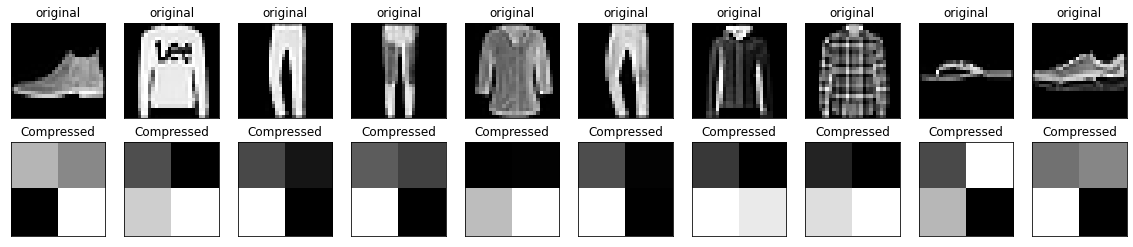

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(2,2))
  plt.title("Compressed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Plot your decoded image

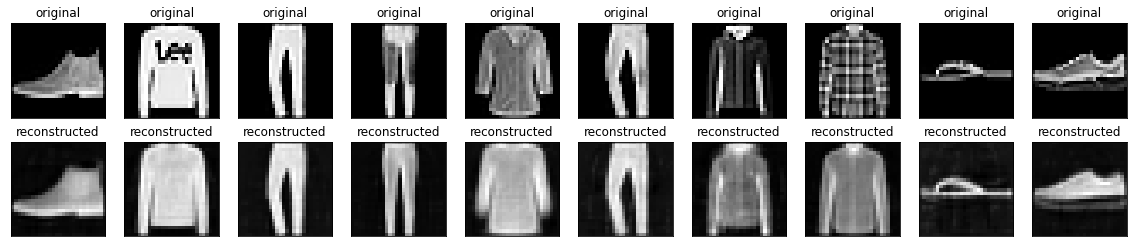

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()